# Importing All required Libraries

In [1]:
## for data reading
import numpy as np
import pandas as pd

## for model analysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## for graphical representation
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Read Data

In [3]:
x_train = np.genfromtxt('x_train.csv', delimiter = ',')[1:, 1:]
x_validate = np.genfromtxt('x_validate.csv', delimiter = ',')[1:, 1:]
x_test = np.genfromtxt('x_test.csv', delimiter = ',')[1:, 1:]

In [4]:
y_train = np.genfromtxt('y_train.csv', delimiter = ',')[1:, 1:]
y_train = y_train.reshape(y_train.shape[0])

y_test = np.genfromtxt('y_test.csv', delimiter = ',')[1:, 1:]
y_test = y_test.reshape(y_test.shape[0])

y_validate = np.genfromtxt('y_validate.csv', delimiter = ',')[1:, 1:]
y_validate = y_validate.reshape(y_validate.shape[0])

# Base Line Model (With Out Optimization)

In [15]:
clf = SVC(random_state = 0)
clf.fit(x_train, y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

In [16]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       879
         2.0       1.00      1.00      1.00       888
         3.0       0.96      1.00      0.98       878
         4.0       0.91      0.95      0.93       897
         5.0       1.00      1.00      1.00       874
         6.0       0.98      0.99      0.98       883
         7.0       0.96      0.92      0.94       898
         8.0       1.00      0.94      0.97       843

    accuracy                           0.97      7040
   macro avg       0.98      0.97      0.97      7040
weighted avg       0.98      0.97      0.97      7040



In [17]:
print("Test Accuracy Score : ", accuracy_score(y_test, y_pred_test))
print("Train Accuracy Score : ", accuracy_score(y_train, y_pred_train))

Test Accuracy Score :  0.9744318181818182
Train Accuracy Score :  0.9939320388349514


# Parameter Tuning

In [24]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, n_jobs = -1) 
  
# fitting the model for grid search 
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 16.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [25]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [28]:
# testing the model
y_pred = grid.predict(x_test)

In [29]:
# performance analysis of the model
class_rep = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(class_rep)
print('\n\nConfusion Matrix : \n')
print(conf_mat)
print('\n\n Accuracy Score : ', accuracy)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       879
         2.0       1.00      1.00      1.00       888
         3.0       0.95      1.00      0.97       878
         4.0       0.87      0.96      0.91       897
         5.0       1.00      1.00      1.00       874
         6.0       0.98      0.99      0.99       883
         7.0       0.96      0.91      0.93       898
         8.0       1.00      0.88      0.94       843

    accuracy                           0.97      7040
   macro avg       0.97      0.97      0.97      7040
weighted avg       0.97      0.97      0.97      7040



Confusion Matrix : 

[[879   0   0   0   0   0   0   0]
 [  0 888   0   0   0   0   0   0]
 [  0   0 877   1   0   0   0   0]
 [  0   0   1 863   0   4  29   0]
 [  0   0   1   0 871   2   0   0]
 [  0   0   2   3   0 876   2   0]
 [  0   0   0  71   0  13 814   0]
 [  0   0  42  58   0   0   0 743]]


 Accuracy Score :  0.967471590909091


Text(114.0, 0.5, 'Actual Class')

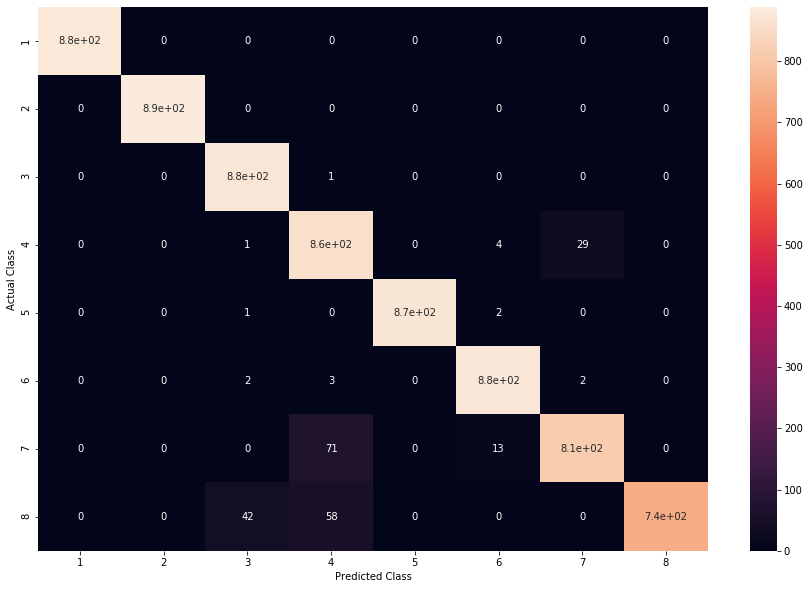

In [30]:
# visualization of the predicted class vs actual class (0 based indexing)
plt.figure(figsize = (15, 10))
classes = [i for i in range(1, 9)]
svm_df = pd.DataFrame(conf_mat, index = classes, columns = classes)
sns.heatmap(svm_df, annot = True)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

In [31]:
# Accuracy Score = 0.97